<a href="https://colab.research.google.com/github/premswaroopmusti/LSTM-RNN-Model-For-Univariate-Time-Series-Forecasting/blob/main/LSTM_RNN_Model_For_Univariate_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem Statement - Univariate Time Series Forecasting**

[110, 125, 133, 146, 158, 172, 187, 196, 210]

Suppose there is a company, on the first day it has made 110 sales, on the 2nd day 125 sales, 3rd day 133 sales and so on as u can see in the list.

Now my problem statement is that considering the previous three days sales, i need to predict the next day sale. 

[110, 125, 133, 146, 158, 172, 187, 196, 210]
here we are given sales of 9 days, we have to predict the sales of 10th day considering the previous three days sales.

lets assume 10th day sales were 230 

[110, 125, 133, 146, 158, 172, 187, 196, 210, 230]

so now we have to predict 11th day sales using previous three days sales

so similarly we will be doing continuously like this for next 10 days

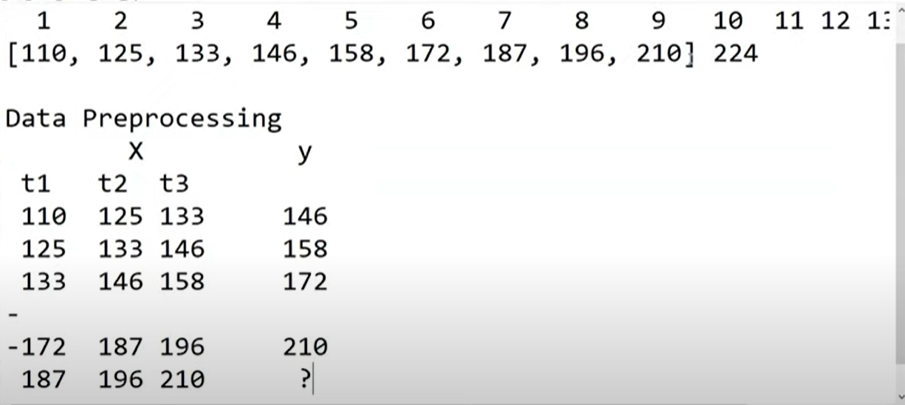

So this is how we are going to do the data preprocessing

For every time-series problem we have to pre-process our data in such a way that we will be able to create our x and y values i.e our independent and dependent features based on the number of time steps u have taken

we have taken 3 timesteps here,so we will calculate based on the previous three days sales

After doing Data pre-processing we have to apply simple LSTM RNN model

Because we are dealing with sequential data

We will also be predicting the sales for the future 10 days and finally we will be plotting also 


In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten

In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
  x, y = [],[]
  for i in range(len(timeseries_data)):
    # find the end of this pattern
    end_ix = i + n_features
    # check if we are beyond the sequence
    if end_ix > len(timeseries_data) - 1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
    x.append(seq_x)
    y.append(seq_y)
  
  return np.array(x), np.array(y)  

In [3]:
# define input sequence
timeseries_data = [110,125,135,156,169,175,189,196,201]
# choose number of time steps
n_steps = 3
# split into samples
x, y = prepare_data(timeseries_data,n_steps)

In [4]:
print(x)
print(y)

[[110 125 135]
 [125 135 156]
 [135 156 169]
 [156 169 175]
 [169 175 189]
 [175 189 196]]
[156 169 175 189 196 201]


In [5]:
x.shape


(6, 3)

In [6]:
# reshape from [samples, timestamps] into [samples, timestamps, features]
n_features = 1
x = x.reshape((x.shape[0],x.shape[1],n_features))

In [7]:
x.shape

(6, 3, 1)

whenever we are implementing LSTM,u always have to reshape ur data into a 3-dimension

In [8]:
# define model
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences = True , input_shape = (n_steps, n_features)))
model.add(LSTM(50,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mse')
# fit model
model.fit(x,y , epochs = 300, verbose = 0)

## **Predicting the next 10 days sales**

In [12]:
# demonstrate the prediction for next 10 days
x_input = np.array([189,196,201])                 # taking the sales data of 7th,8th,9th day as an input
temp_input = list(x_input)
lst_output = []
i = 0
while(i < 10):

  if(len(temp_input)>3):
    x_input = np.array(temp_input[1:])
    print('{} day input {}'.format(i,x_input))
    #print(x_input)
    x_input = x_input.reshape((1, n_steps, n_features))
    #print(x_input)
    y_hat = model.predict(x_input, verbose = 0)
    print('{} day output {}'.format(i,y_hat))
    temp_input.append(y_hat[0][0])
    temp_input = temp_input[1:]
    #print(temp_input)
    lst_output.append(y_hat[0][0])
    i = i + 1

  else:
    x_input = x_input.reshape((1, n_steps, n_features))
    # print(x_input)
    y_hat = model.predict(x_input, verbose = 0)
    print(y_hat[0])
    temp_input.append(y_hat[0][0])
    lst_output.append(y_hat[0][0])
    i = i + 1

print(lst_output)






[210.15178]
1 day input [196.         201.         210.15177917]
1 day output [[215.44467]]
2 day input [201.         210.15177917 215.44467163]
2 day output [[219.90158]]
3 day input [210.15178 215.44467 219.90158]
3 day output [[225.97556]]
4 day input [215.44467 219.90158 225.97556]
4 day output [[230.16447]]
5 day input [219.90158 225.97556 230.16447]
5 day output [[234.10504]]
6 day input [225.97556 230.16447 234.10504]
6 day output [[238.49298]]
7 day input [230.16447 234.10504 238.49298]
7 day output [[241.97066]]
8 day input [234.10504 238.49298 241.97066]
8 day output [[245.36313]]
9 day input [238.49298 241.97066 245.36313]
9 day output [[248.77437]]
[210.15178, 215.44467, 219.90158, 225.97556, 230.16447, 234.10504, 238.49298, 241.97066, 245.36313, 248.77437]


In [14]:
# next 10 days sales prediction
lst_output

[210.15178,
 215.44467,
 219.90158,
 225.97556,
 230.16447,
 234.10504,
 238.49298,
 241.97066,
 245.36313,
 248.77437]

### ***Visualizing the Output***

In [15]:
import matplotlib.pyplot as plt


In [16]:
day_new = np.arange(1,10)
day_pred = np.arange(10,20)


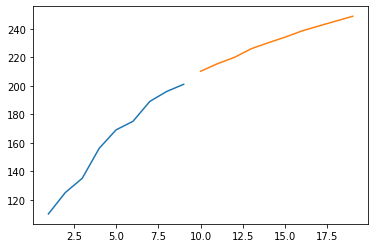

In [19]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)